In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("./static/data/newmerged18_df.csv")
# Drop the null columns where all values are null
#df = df.dropna(axis='columns', how='all')
# Drop the null rows
#df = df.dropna()
df.replace(np.nan, 0)
df

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV,Playoffs
0,1,21800001,1610612755,21,21,24,21,0,0,0,0,87,0.391,0.609,0.192,18,47,16,1
1,1,21800014,1610612755,38,27,37,25,0,0,0,0,127,0.473,0.900,0.333,30,55,13,1
2,4,21800029,1610612755,30,33,26,27,0,0,0,0,116,0.479,0.900,0.515,33,46,10,1
3,1,21800049,1610612755,28,36,30,26,12,0,0,0,132,0.500,0.714,0.326,32,48,11,1
4,8,21800059,1610612755,34,30,17,27,0,0,0,0,108,0.413,0.700,0.324,29,50,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,11,21801175,1610612757,28,34,24,30,0,0,0,0,116,0.511,0.625,0.323,28,54,13,1
2456,11,21801190,1610612757,29,21,37,23,0,0,0,0,110,0.488,0.800,0.345,24,40,14,1
2457,12,21801206,1610612757,29,31,26,29,0,0,0,0,115,0.461,0.828,0.321,22,58,16,1
2458,11,21801219,1610612757,26,27,20,31,0,0,0,0,104,0.411,0.864,0.297,18,45,12,1


# Create a Train Test Split

Use `Playoffs` for the y values

In [5]:
y=df["Playoffs"]
X=df.drop(columns=["Playoffs"])
X

,GAME_SEQUENCE,GAME_ID,TEAM_ID,PTS_QTR1,PTS_QTR2,PTS_QTR3,PTS_QTR4,PTS_OT1,PTS_OT2,PTS_OT3,PTS_OT4,PTS,FG_PCT,FT_PCT,FG3_PCT,AST,REB,TOV
0,1,21800001,1610612755,21,21,24,21,0,0,0,0,87,0.391,0.609,0.192,18,47,16
1,1,21800014,1610612755,38,27,37,25,0,0,0,0,127,0.473,0.900,0.333,30,55,13
2,4,21800029,1610612755,30,33,26,27,0,0,0,0,116,0.479,0.900,0.515,33,46,10
3,1,21800049,1610612755,28,36,30,26,12,0,0,0,132,0.500,0.714,0.326,32,48,11
4,8,21800059,1610612755,34,30,17,27,0,0,0,0,108,0.413,0.700,0.324,29,50,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,11,21801175,1610612757,28,34,24,30,0,0,0,0,116,0.511,0.625,0.323,28,54,13
2456,11,21801190,1610612757,29,21,37,23,0,0,0,0,110,0.488,0.800,0.345,24,40,14
2457,12,21801206,1610612757,29,31,26,29,0,0,0,0,115,0.461,0.828,0.321,22,58,16
2458,11,21801219,1610612757,26,27,20,31,0,0,0,0,104,0.411,0.864,0.297,18,45,12


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [7]:
X_train.shape, X_test.shape

((1845, 18), (615, 18))

# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [8]:
# Scale your data
from sklearn.preprocessing import MinMaxScaler
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Train the Model



In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression()

In [10]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression()

In [11]:
importance = classifier.coef_[0]
importance

array([-0.33491202, -0.17028329,  0.82074306,  0.34460777, -0.06504863,
        0.17521932, -0.01620222, -0.27373869, -0.21396021, -0.59649428,
       -0.5289242 , -0.08786154,  0.9834233 ,  1.4607522 ,  0.38786663,
        0.51396371,  1.93476942, -0.88601981])

In [12]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: -0.33491
Feature: 1, Score: -0.17028
Feature: 2, Score: 0.82074
Feature: 3, Score: 0.34461
Feature: 4, Score: -0.06505
Feature: 5, Score: 0.17522
Feature: 6, Score: -0.01620
Feature: 7, Score: -0.27374
Feature: 8, Score: -0.21396
Feature: 9, Score: -0.59649
Feature: 10, Score: -0.52892
Feature: 11, Score: -0.08786
Feature: 12, Score: 0.98342
Feature: 13, Score: 1.46075
Feature: 14, Score: 0.38787
Feature: 15, Score: 0.51396
Feature: 16, Score: 1.93477
Feature: 17, Score: -0.88602


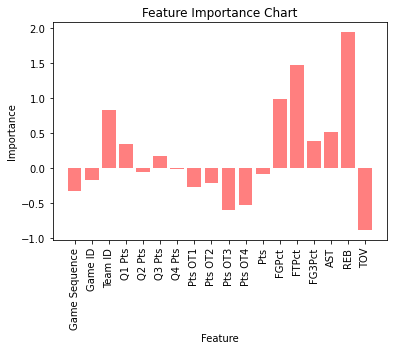

In [13]:
pyplot.bar([x for x in range(len(importance))], importance, color = 'r', alpha = 0.5, align = 'center')
tick_locations = [x for x in range(len(importance))]
pyplot.xticks(tick_locations, ["Game Sequence", "Game ID", "Team ID", "Q1 Pts", "Q2 Pts", "Q3 Pts", 
                            "Q4 Pts", "Pts OT1", "Pts OT2", "Pts OT3", "Pts OT4", "Pts", "FGPct", "FTPct","FG3Pct", "AST", "REB", "TOV"],
                              rotation = 'vertical')
pyplot.title("Feature Importance Chart")
pyplot.xlabel("Feature")
pyplot.ylabel("Importance")
pyplot.show()

In [14]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.6075880758807588
Testing Data Score: 0.6390243902439025
